## Notebook com deep learning para análise de sentimentos

### Imports usados no notebook

In [3]:
# data frame para manipular os dados
import pandas as pd

# stop words
from nltk.corpus import stopwords

# regex
import re

#separar conjunto de teste e treinamento
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# parte de deeplearning
from keras import models
from keras import layers
from keras import regularizers

from matplotlib import pyplot as plt


### Limpando o arquivo csv para deixar só os dados que nos interessam.

In [4]:
data = pd.read_csv("Tweets.csv")

data = data[['text','airline_sentiment']]

data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


### removendo stop words e limpando nosso texto

In [5]:
def remove_stop(text):
    stop = stopwords.words('english')
    white_list = ['no','not',"n't"]
    text = text.split()
    text = [pal for pal in text if (pal in white_list or not pal in stop)]
    return " ".join(text)

def remove_mentions(text):
    text = re.sub("@\w+","",text)
    text = re.sub("#\w+","",text)
    text = text.lower()
    return text

In [6]:
data['text'] = data['text'].apply(remove_stop).apply(remove_mentions)

data['tokens'] = data['text'].apply(nltk.word_tokenize)

data

,text,airline_sentiment,tokens
0,what said.,neutral,"[what, said, .]"
1,plus added commercials experience... tacky.,positive,"[plus, added, commercials, experience, ..., ta..."
2,i today... must mean i need take another trip!,neutral,"[i, today, ..., must, mean, i, need, take, ano..."
3,"really aggressive blast obnoxious ""entertainm...",negative,"[really, aggressive, blast, obnoxious, ``, ent..."
4,really big bad thing,negative,"[really, big, bad, thing]"
...,...,...,...
14635,thank got different flight chicago.,positive,"[thank, got, different, flight, chicago, .]"
14636,leaving 20 minutes late flight. no warnings c...,negative,"[leaving, 20, minutes, late, flight, ., no, wa..."
14637,please bring american airlines,neutral,"[please, bring, american, airlines]"
14638,"money, change flight, answer phones! any sugg...",negative,"[money, ,, change, flight, ,, answer, phones, ..."


In [7]:
xtrain, ytest, xright, yright = train_test_split(data.text.tolist(),data.airline_sentiment.tolist(),random_state=4)

### Criando uma representação das sentenças em uma matriz

In [8]:
tfidf = TfidfVectorizer()
xtrain_matrix = tfidf.fit_transform(xtrain)
ytest_matrix = tfidf.transform(ytest)

xtrain_matrix.shape

(10980, 10957)

In [9]:
xright_matrix = tfidf.fit_transform(xright)
yright_matrix = tfidf.transform(yright)

In [10]:
xright_matrix[0].shape

(1, 3)

In [20]:
xright

['negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'neg

In [21]:
yright_matrix.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Criando a rede neural

In [13]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(10957,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                701312    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 705,667
Trainable params: 705,667
Non-trainable params: 0
_________________________________________________________________


### Treinando a rede e verificando a resposta

In [14]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(xtrain_matrix
                       , xright_matrix
                       , epochs=20
                       , batch_size=512
                       , validation_data=(ytest_matrix, yright_matrix)
                       , verbose=0)
    
    return history

base_history = deep_model(base_model)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



### Verificando as métricas

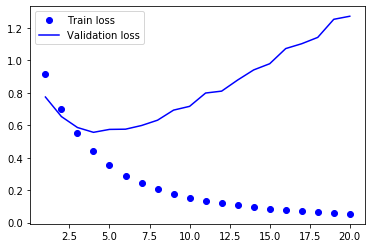

In [15]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, 20 + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()
    
eval_metric(base_history,"loss")

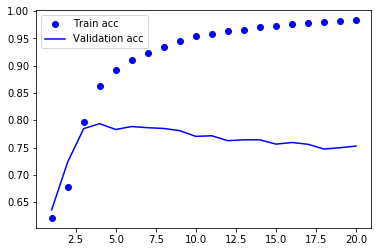

In [16]:
eval_metric(base_history, 'acc')

### Para parar o overffiting do modelo vamos tentar diminuir a quantidade de neuronios nas camadas intermediarias.

In [17]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(10957,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                350656    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 350,755
Trainable params: 350,755
Non-trainable params: 0
_________________________________________________________________


In [18]:
reduced = deep_model(reduced_model)

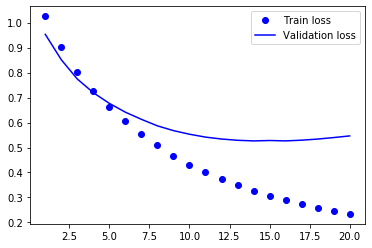

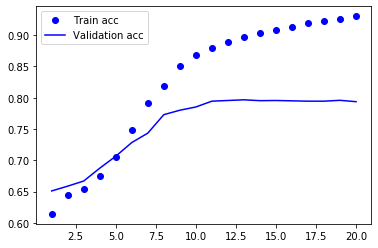

In [19]:
eval_metric(reduced,"loss")
eval_metric(reduced,"acc")